In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv("../../datasets/income.csv")
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [31]:
df['Income'] = df['Income($)']
df.drop(['Income($)'], axis=1, inplace=True)
df.head(5)

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

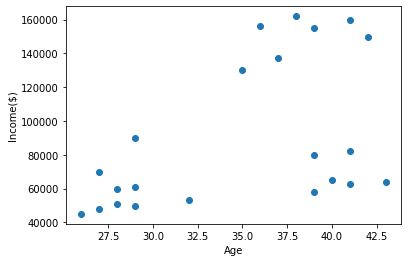

In [9]:
plt.scatter(df.Age, df.Income)
plt.xlabel('Age')
plt.ylabel('Income($)')

In [10]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [12]:
df['cluster'] = y_predicted
df.head(5)

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

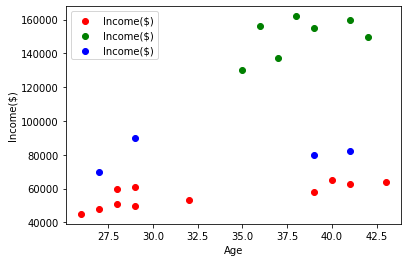

In [21]:
plt.scatter(df1.Age, df1.Income, color='red', label='Income($)')
plt.scatter(df2.Age, df2.Income, color='green', label='Income($)')
plt.scatter(df3.Age, df3.Income, color='blue', label='Income($)')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

#### With the number of cluster we took initially if the dataset properly clustred then we don't need to scale it else we need to scale the data. Here data is not properly clustred as x and y labels are not properly scaled

In [38]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])
df.head(5)

,Name,Age,Income
0,Rob,27,0.213675
1,Michael,29,0.384615
2,Mohan,29,0.136752
3,Ismail,28,0.128205
4,Kory,42,0.897436


In [42]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df.head(5)

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [48]:
km = KMeans(n_clusters=3)

In [49]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [50]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [46]:
df['cluster'] = y_predicted
df.head(5)

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


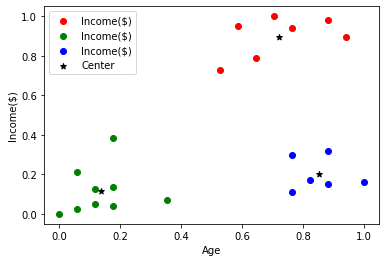

In [51]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1.Income, color='red', label='Income($)')
plt.scatter(df2.Age, df2.Income, color='green', label='Income($)')
plt.scatter(df3.Age, df3.Income, color='blue', label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black',label='Center', marker='*')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

#### Try to identify what is k for this dataset

In [54]:
k_range = range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

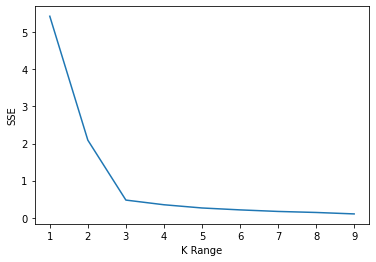

In [55]:
plt.xlabel('K Range')
plt.ylabel('SSE')
plt.plot(k_range, sse)

### Exercise

In [56]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [57]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
df= df.drop(['sepal length (cm)','sepal width (cm)'], axis=1)
df.head(5)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [59]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [62]:
df['cluster'] = y_predicted
df.head(5)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [66]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

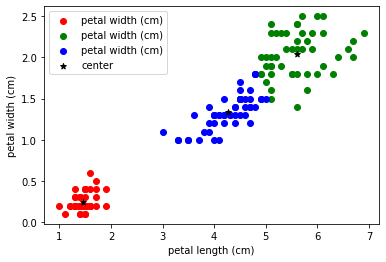

In [70]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', label='petal width (cm)')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='petal width (cm)')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue', label='petal width (cm)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', label='center', marker='*')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

#### Find the best scale for this dataset

In [72]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

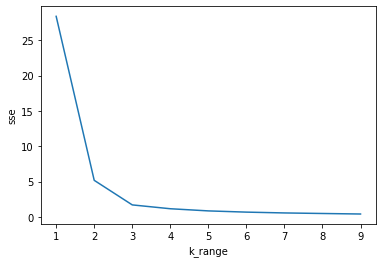

In [73]:
plt.xlabel('k_range')
plt.ylabel('sse')
plt.plot(k_range, sse)